In [1]:
%matplotlib notebook

# 2) Line bands interative inspection

In the previous tutorial, we measured one line from the OSIRIS spectrum of the galaxy GP121903. Before proceding to analyze the full spectrum, however, it is recommended to confirm the presence of lines.

In this tutorial, we are going to compare $LiMe$ lines database with the emission features observed in this spectrum. To do that we are going to use the ``Spectrum.check.bands`` function to iteratively adjust the observed bands to our instrument and observation. 

If you are using a jupyter notebook, it is easier to use the ``%matplotlib ql`` backend at the top of your notebook, for a better iteration with your plots.

This tutorial is available as a script and a notebook in the in the [github examples folder](https://github.com/Vital-Fernandez/lime/tree/master/examples).. The galaxy spectrum is also available in the [github sample data](https://github.com/Vital-Fernandez/lime/tree/master/examples/sample_data).

## Loading the data

Let's start by importing the script packages and defining a function to read the ISIS spectrograph *.fits* files:

In [2]:
import numpy as np
from astropy.io import fits
from pathlib import Path
from IPython.display import Image, display
import lime

In [3]:
def import_osiris_fits(file_address, ext=0):

    # Open the fits file
    with fits.open(file_address) as hdul:
        data, header = hdul[ext].data, hdul[ext].header

    # Reconstruct the wavelength array from the header data
    w_min, dw, n_pix = header['CRVAL1'],  header['CD1_1'], header['NAXIS1']
    w_max = w_min + dw * n_pix
    wavelength = np.linspace(w_min, w_max, n_pix, endpoint=False)

    return wavelength, data, header

In [4]:
# State the scientific data
obsFitsFile = '../sample_data/gp121903_osiris.fits'
z_obj = 0.19531
norm_flux = 1e-18

# Load spectrum
wave, flux, header = import_osiris_fits(obsFitsFile)

Now we can define our ``lime.Spectrum`` object:

<IPython.core.display.Javascript object>


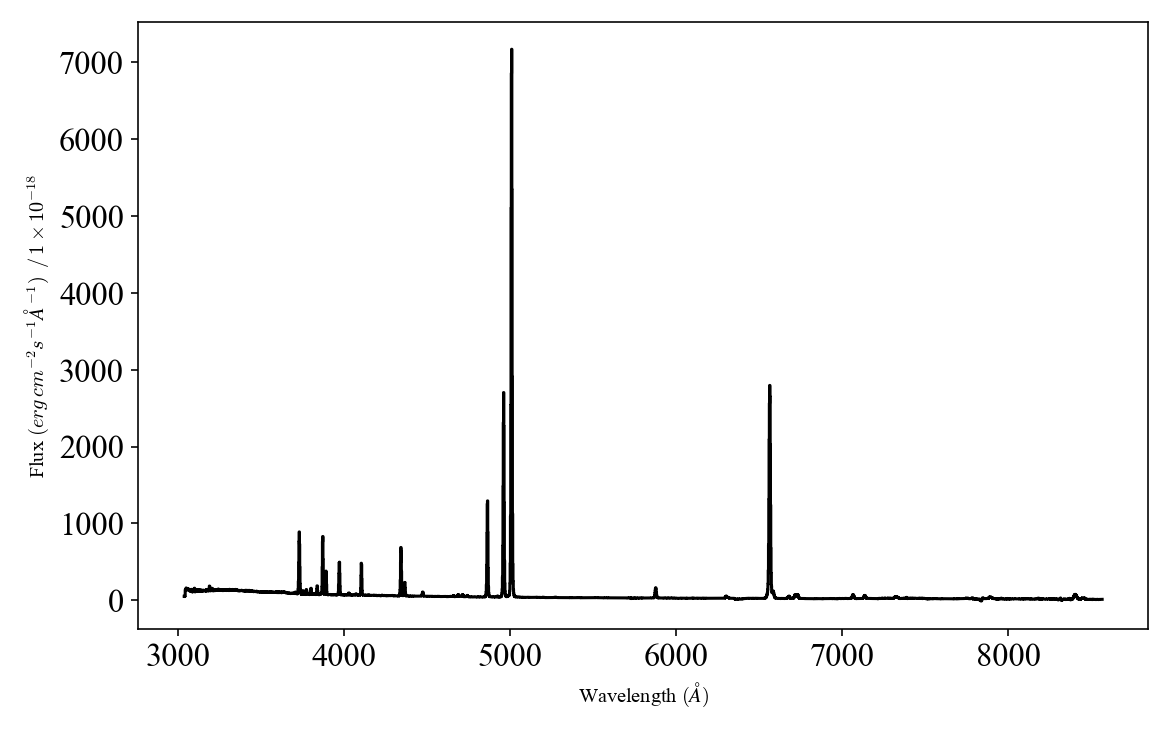

In [5]:
gp_spec = lime.Spectrum(wave, flux, redshift=z_obj, norm_flux=norm_flux, units_wave='A', units_flux='Flam')
gp_spec.plot.spectrum(rest_frame=True)

The ``lime.spectral_bands`` allow us to import a dataframe with the  of line bands:

In [6]:
bands_df = lime.line_bands()

In [7]:
bands_df

,wavelength,wave_vac,w1,w2,w3,w4,w5,w6,latex_label,particle,transition,rel_int
H1_1215A,1215.1108,1215.6699,1100.0,1150.0,1195.00000,1230.000000,1250.0,1300.0,$HI1215\AA$,H1,rec,0
C4_1548A,1547.6001,1548.1870,1400.0,1450.0,1530.00000,1565.000000,1600.0,1650.0,$CIV]1548\AA$,C4,sem,0
He2_1640A,1639.7896,1640.3913,1600.0,1630.0,1635.00000,1645.000000,1700.0,1750.0,$HeII1640\AA$,He2,rec,0
O3_1666A,1665.5438,1666.1500,1600.0,1630.0,1660.00000,1680.000000,1700.0,1750.0,$[OIII]1666\AA$,O3,col,0
C3_1908A,1908.0803,1908.7340,1870.0,1895.0,1898.18782,1912.243544,1930.0,1950.0,$CIII]1908\AA$,C3,sem,0
...,...,...,...,...,...,...,...,...,...,...,...,...
H1_37395A,37394.7903,37405.5500,37365.0,37385.0,37395.00000,37415.000000,37425.0,37440.0,$HI37395\AA$,H1,rec,0
H1_40511A,40511.0344,40522.6900,40490.0,40500.0,40510.00000,40535.000000,40550.0,40570.0,$HI40511\AA$,H1,rec,0
H1_46524A,46524.3554,46537.7400,46510.0,46515.0,46534.00000,46546.000000,46555.0,46575.0,$HI46524\AA$,H1,rec,0
S4_105075A,105074.7773,105105.0000,104700.0,104900.0,105000.00000,105200.000000,105300.0,105500.0,$[SIV]105075\AA$,S4,col,0


The default database is too large for an indivual spectrum. You can provide a wavelength range (in the rest frame) to constrain the output lines. Incidentally, you can also provide a ``lime.Spectrum`` to state the wavelength limits:

In [8]:
bands_df = lime.line_bands(wave_intvl=gp_spec)

In [9]:
bands_df

,wavelength,wave_vac,w1,w2,w3,w4,w5,w6,latex_label,particle,transition,rel_int
Ne5_3426A,3426.0000,3426.0000,3390.000000,3410.000000,3420.000000,3430.000000,3445.000000,3465.000000,$[NeV]3426\AA$,Ne5,col,0
H1_3704A,3703.8013,3704.9132,3671.309441,3681.364925,3700.450000,3709.100000,3758.000000,3764.000000,$HI3704\AA$,H1,rec,0
O2_3726A,3726.0300,3727.1000,3665.750000,3694.260000,3716.020000,3743.700000,3754.880000,3767.500000,$[OII]3726\AA$,O2,col,0
O2_3729A,3728.8200,3729.8600,3665.750000,3694.260000,3716.020000,3743.700000,3754.880000,3767.500000,$[OII]3729\AA$,O2,col,0
H1_3750A,3750.0998,3751.2244,3664.503848,3675.720417,3746.433569,3756.674784,3775.220000,3792.040000,$HI3750\AA$,H1,rec,0
H1_3771A,3770.5779,3771.7081,3759.191222,3767.280375,3767.467189,3775.787336,3776.807987,3782.905843,$HI3771\AA$,H1,rec,0
H1_3798A,3797.8450,3798.9827,3780.949179,3792.078244,3793.707971,3803.676860,3807.127865,3816.774280,$HI3798\AA$,H1,rec,0
H1_3835A,3835.3309,3836.4789,3823.148476,3829.538777,3831.331855,3840.896149,3844.260000,3852.830000,$HI3835\AA$,H1,rec,0
Ne3_3869A,3868.7029,3869.8600,3848.429950,3858.099497,3862.724063,3876.597761,3895.538694,3910.048413,$[NeIII]3869\AA$,Ne3,col,0
H1_3889A,3888.9950,3890.1577,3842.087829,3861.282614,3880.390000,3899.420000,3905.000000,3950.000000,$HI3889\AA$,H1,rec,0


In addition to the wavelength range, you can also constrain the output table based on a list of ionic species. Moreover, you can also state the labels and wavelength units.   

A bands dataframe/file consists in a table, where the line bands wavelength limits are stored space-separated columns. The first column has the line label (in the $LiMe$ format). The remaining 6 columns specify the line location along with two adjacent continua regions. The image belows shows and example with the H1_3889A bands:
    

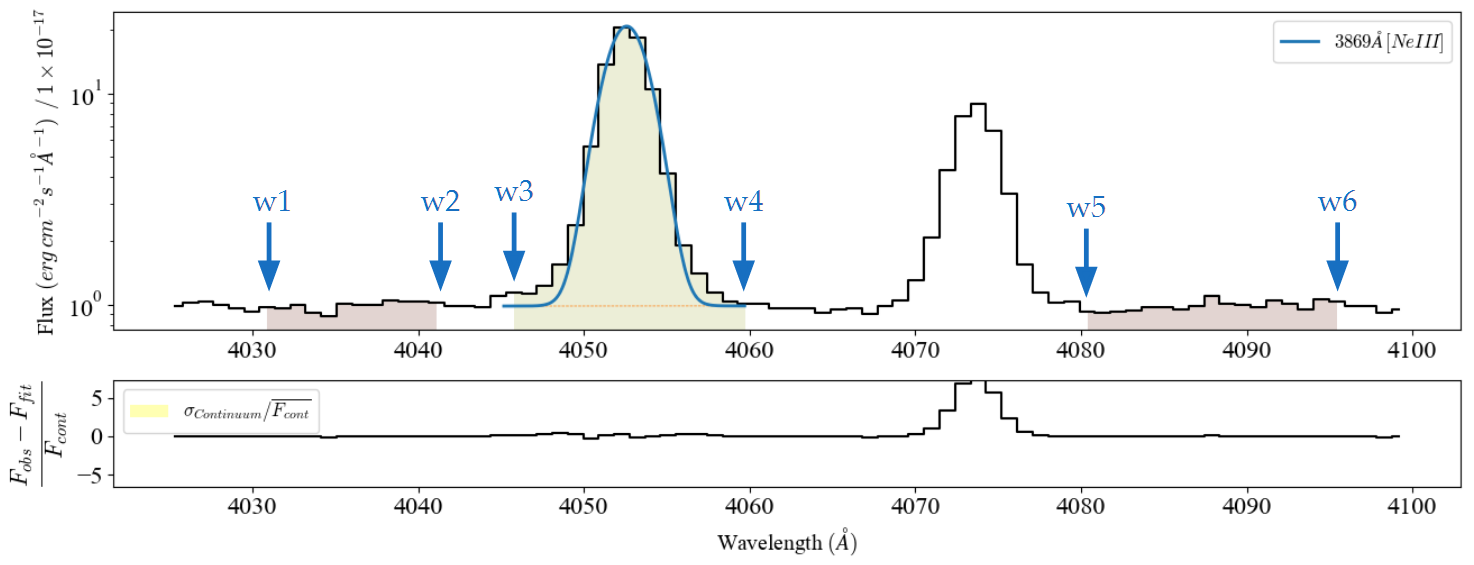

In [10]:
display(Image(filename='../images/bands_definition.png'))

<div class="alert alert-info">

**Please remember:** The band wavelengths must be on the rest frame and sorted from lower to higher values. Finally, make sure that these wavelengths are in the same units as those from your spectrum. 

</div>

We can save these bands using ``lime.save_log`` function:

In [11]:
# Save to a file (if it does not exist already)
bands_df_file = Path('../sample_data/GP121903_bands.txt')
if bands_df_file.is_file() is not True:
    lime.save_log(bands_df, bands_df_file)

Running the ``Spectrum.check.bands`` function opens the interactive window:

<IPython.core.display.Javascript object>


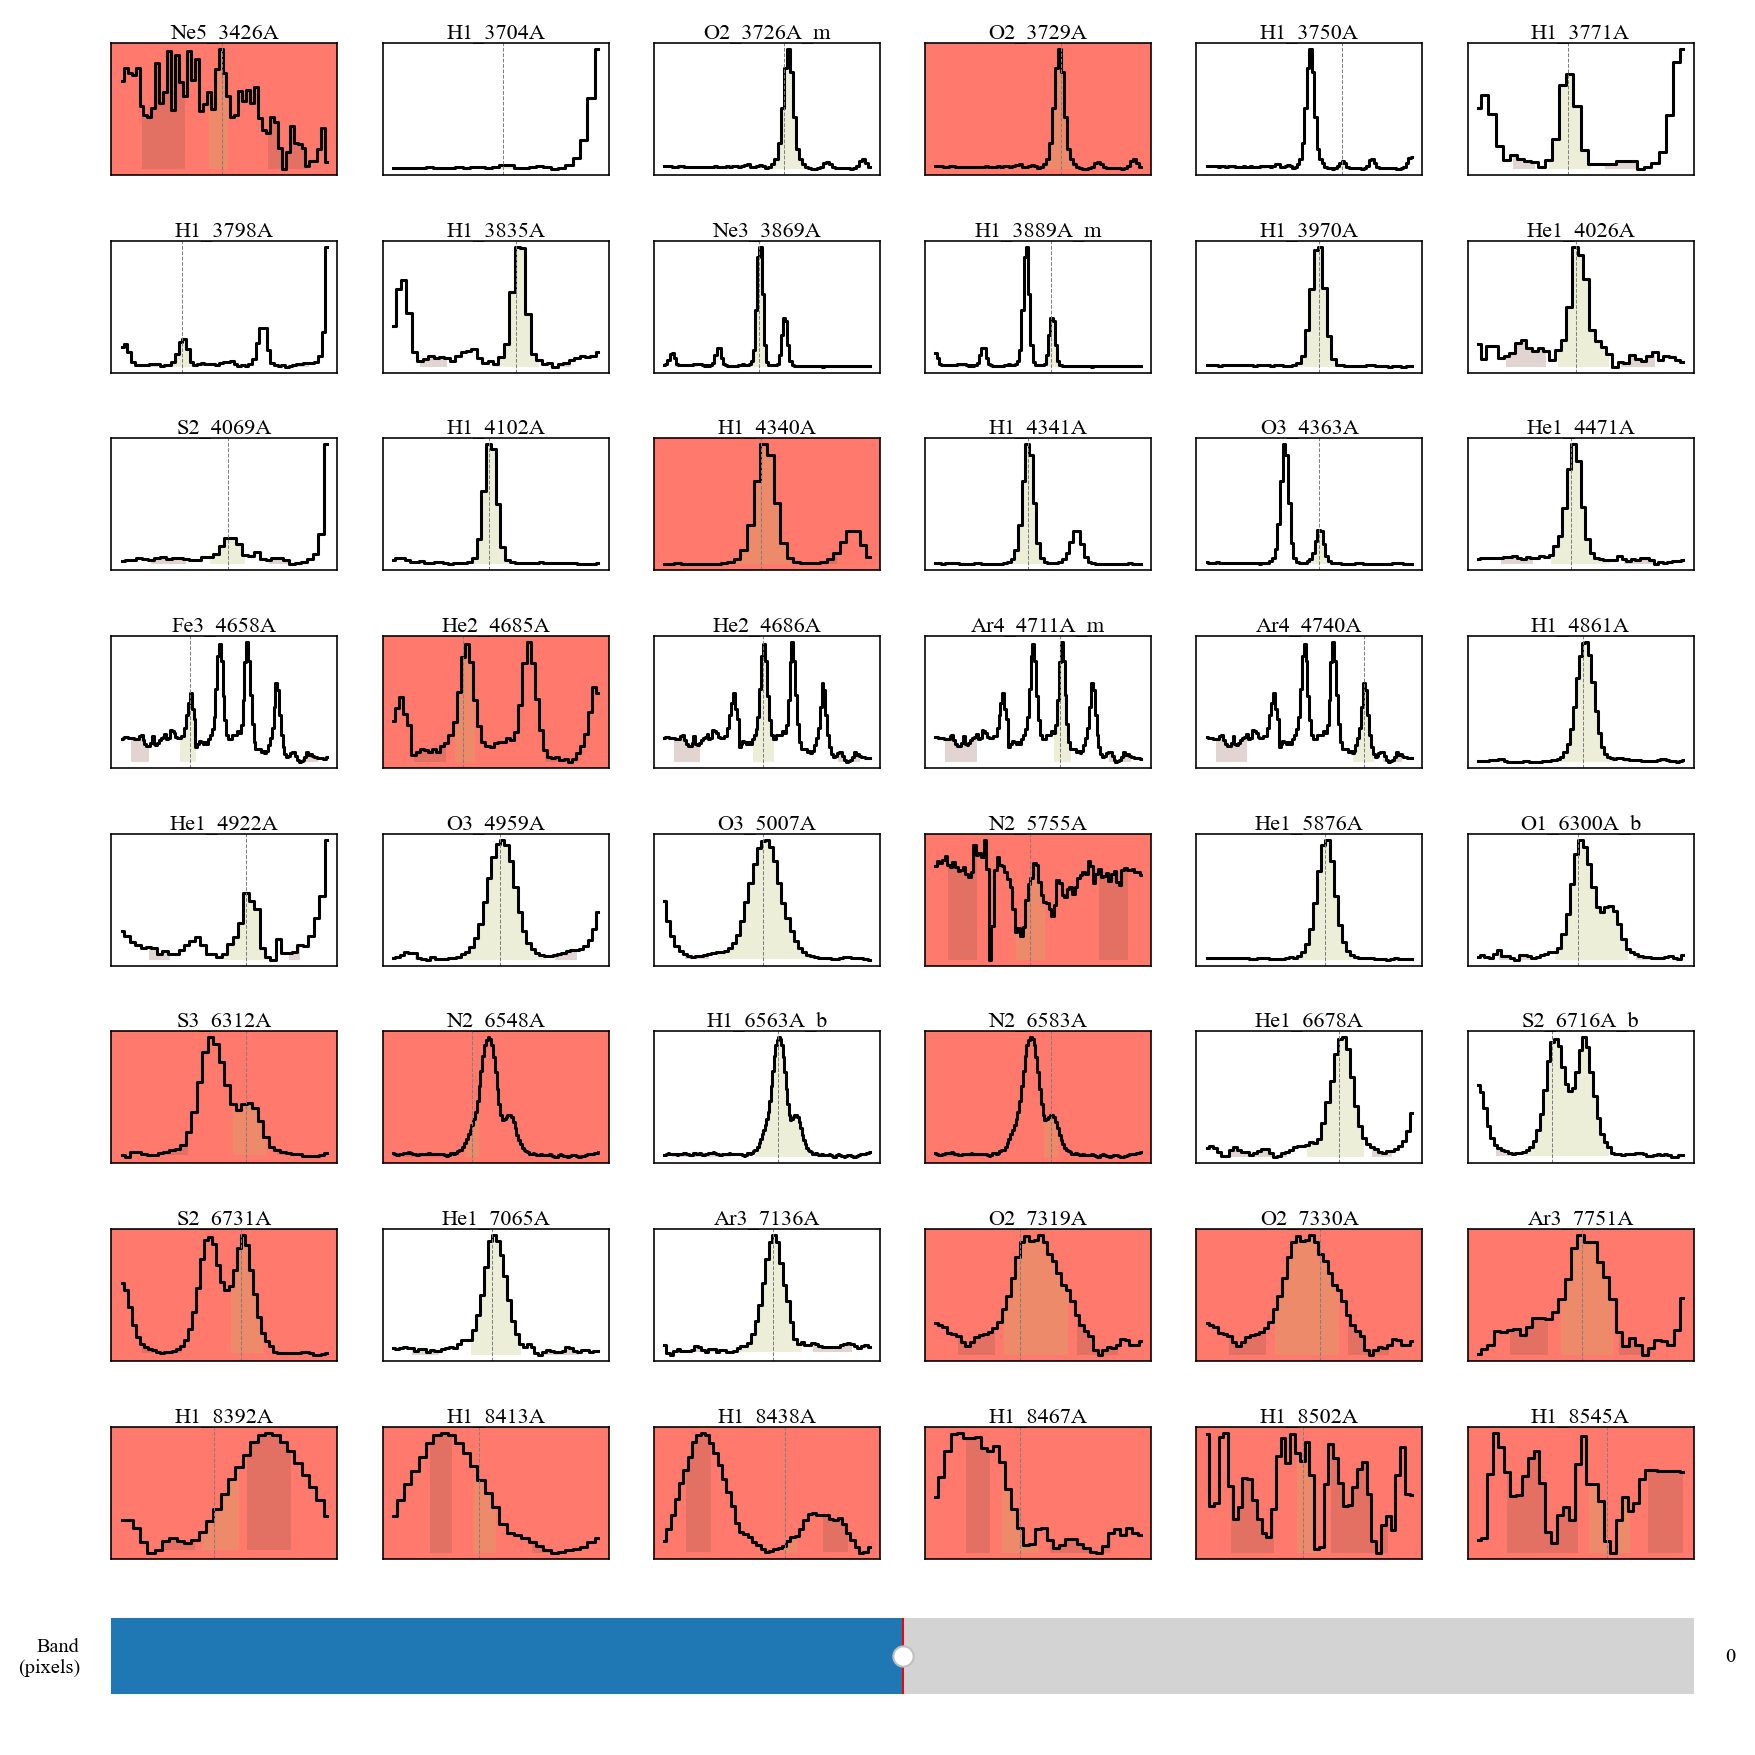

In [12]:
# Review the bands file
gp_spec.check.bands(bands_df_file)

There are several ways to interact with the plots in this grid:
* Right-click on any plot will remove the line from the output bands file. This will switch the background color to red.
* Middle-click on any plot will change the line label suffix on the output bands file. The options are blended ("_b"), merged ("_m") and single (no suffix) lines. This will change line label the plot title correspondingly.
* Left-click and drag allows you to change the bands limits.

In the lattest case, the The line or continua band adjusted depends on the initical click point. There are some caveats in the window selection:
* The plot wavelength range is always 5 pixels beyond the mask bands. Therefore dragging the mouse beyond the mask limits (below w1 or above w6) will change the displayed range. This can be used to move beyond the original mask limits.
* Selections between the w2 and w5 wavelength bands are always assigned to the line region mask as the new w3 and w4 values.
* Due to the previous point, to increase the w2 value or to decrease w5 value the user must select a region between w1 and w3 or w4 and w6 respectively.

Each of these adjustments is stored in the input ``bands_file``.

By default, the ``Spectrum.check.bands`` function compares the input bands file with the default bands database. Consequently, if you ran the script above again, you will still have lines with a red background from lines in the database but not in your previous selection. You can provide your own database (file or dataframe) in the ``parent_bands`` attribute of the  ``Spectrum.check.bands`` function.

At the bottom of the window you can find an slider with the *Band (pixels)*. This slider moves all the bands simultaneously either towards the blue and red limits. 

Finally, the ``Spectrum.check.bands`` function also gives you the oportunity to seet the effect of the spectrum redshift on the bands selection on a pixel bases and save the new value to a text file (or modify the existing value):

<IPython.core.display.Javascript object>


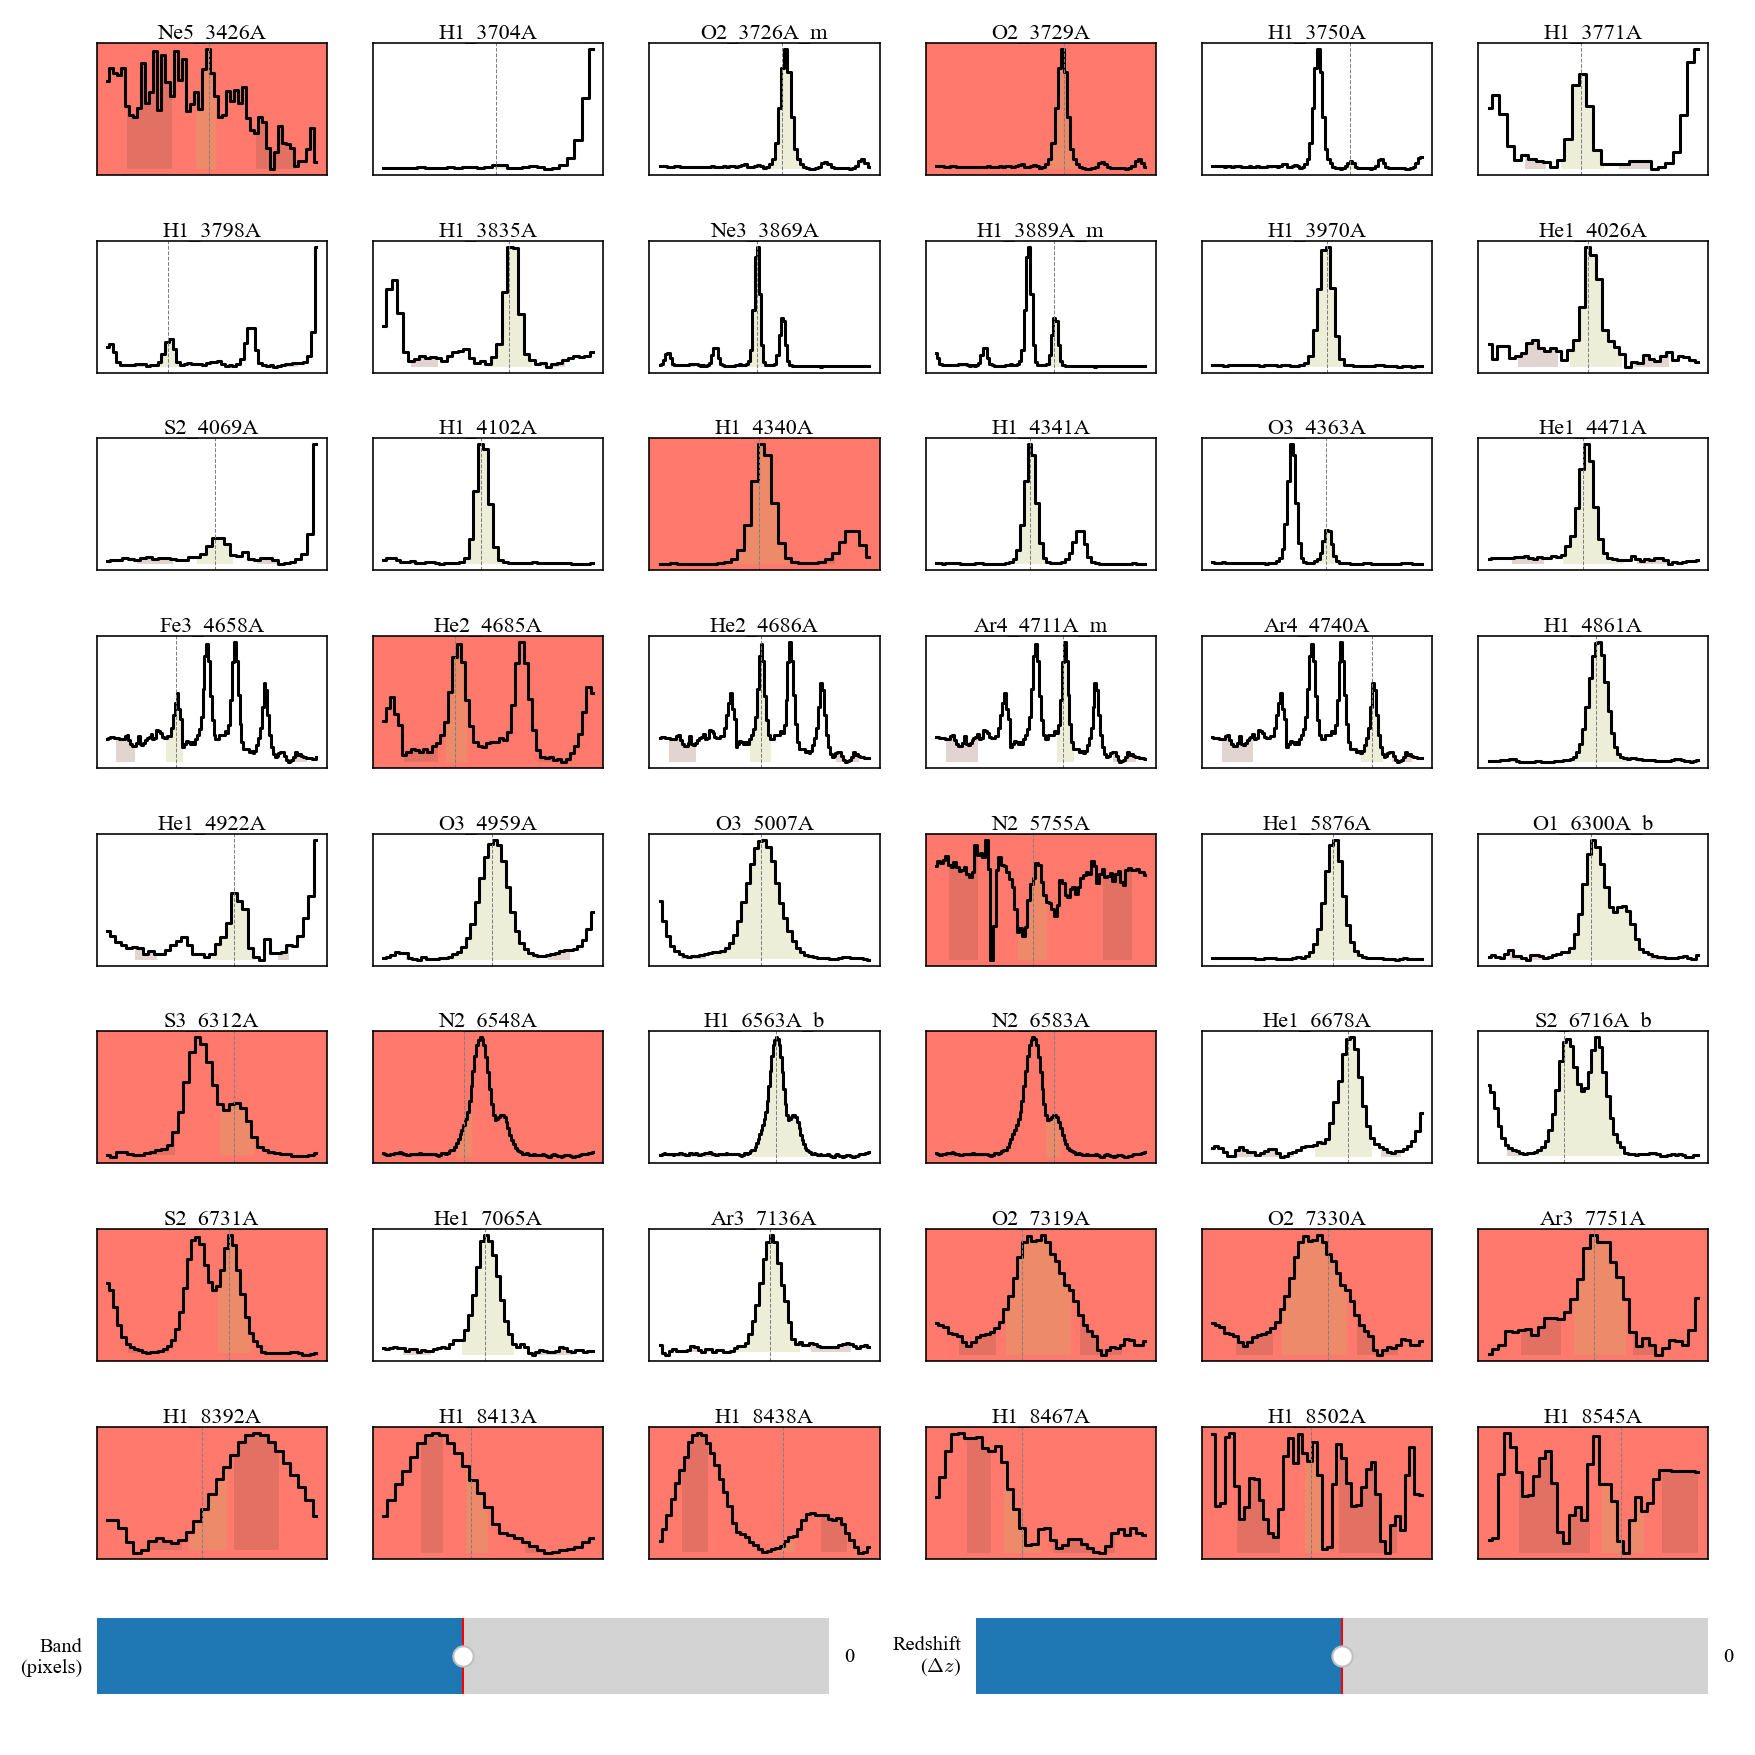

In [13]:
# Adding a redshift file address to store the variations in redshift
redshift_file = '../sample_data/redshift_log.txt'
redshift_file_header, object_ref = 'redshift', 'GP121903'
gp_spec.check.bands(bands_df_file, maximize=True, z_log_address=redshift_file, z_column=redshift_file_header,
                    object_label='object_ref')

The redshift new redshift is stored to the output file but the original ``redshift`` of the ``lime.Spectrum`` does not change (this behaviour shall be change in a future update). 